# Micro Risks and Pareto Improving Policies 

In [1]:
import Pkg; Pkg.activate(joinpath(@__DIR__, ".."))
using Revise
using MicroRisks
using ProgressMeter
using CairoMakie
using LaTeXStrings
using StatsBase
using Polyester
using Roots

  Activating project at `~/Github/micro_risks_pareto_improving_policies-1`


In [2]:
ProgressMeter.ijulia_behavior(:clear);

## Benchmark Economy

In [3]:
# Household
h = let 
    # labor supply
    v = GHH(θ = 1.0, ν = 0.2)
 
    # income process
    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1 + v.ν)
    sigmaIID = sqrt(0.0522)/(1 + v.ν)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    # consumption preferences
    ies = 1 
    crra = 5.5
    β = 0.993
    u = EZ(ies = ies, ra = crra, β = β)

    Household(u = u, a_grid = grid(stop = 10.0, length = 500, scale = :log),
        v = v, P = P, z_grid = z_vals)
end

EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004

In [4]:
# Technology
t = let
    δ = 0.1
    A = 0.2
    α = 0.3
    μ = 1.4
    CobbDouglasTechnology(α = α, A = A^((1 - α)), δ = δ, μ = μ)
end

α=0.3, A=0.32413131933855255, δ=0.1

Initial equilibrium (laissez faire)

In [5]:
@time e_init = stationary_laissez_faire(h, t; r_range = (-0.02, 0.0), verbose = true)

error: -0.12425724188652754 r:-0.02 w:0.15254117924438806 n:0.7247574424512584 k:0.5922608300231876 a:0.4680035881366601
error: 2.168991931750058 r:0.0 w:0.13862904668844298 n:0.7110270304758057 k:0.4224385688767519 a:2.59143050062681
error: 2.168991931750058 r:-1.5289598498960423e-155 w:0.13862904668844298 n:0.7110270304758057 k:0.4224385688767519 a:2.59143050062681
error: -0.10296122716160433 r:-0.019450616617462 w:0.15209442145786614 n:0.7243324148962371 k:0.5861546311833535 a:0.4831934040217492
error: -0.011006161808568615 r:-0.017243538293288556 w:0.15034257622426353 n:0.7226560808921999 k:0.5626456300717849 a:0.5516394682632163
error: -0.00325146031951995 r:-0.01706942330376728 w:0.15020721714086716 n:0.7225259071065232 k:0.5608577859880945 a:0.5576063256685746
error: 2.1689919320954845 r:-5.0365636968723713e-79 w:0.13862904668844298 n:0.7110270304758057 k:0.4224385688767519 a:2.5914305009722365
error: 8.673289106475579e-6 r:-0.0169967679780772 w:0.1501508540091115 n:0.7224716754

Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.01699696069678158, w=0.15015100341943477, T=0.0, a=0.5601165104689341, k=0.5601165047315453, b=0.0, n=0.7224718192241157

## Constant-K Transition

Transition to a higher debt level

In [6]:
# b = 0.6 y0 
b_target = y(e_init) * 0.60

0.13017584231851856

Final equilibrium with higher debt and same k

In [7]:
@time e_final = stationary_equilibrium_given_k_b(e_init, e_init.k, b_target; r_range = (-0.02, 0.0), verbose = true)

error: -0.3156788726104638 r:-0.02 T:0.004285568724460537 a:0.3746134744396001 k:0.5601165047315453 b:0.13017584231851856
error: 3.2791620577839615 r:0.0 T:-0.00952027821654075 a:3.9694544048340252 k:0.5601165047315453 b:0.13017584231851856
error: 3.2791620577839615 r:-1.5289598498960423e-155 T:-0.00952027821654075 a:3.9694544048340252 k:0.5601165047315453 b:0.13017584231851856
error: -0.281215067058446 r:-0.019101692030578345 T:0.0036654736078746974 a:0.4090772799916178 k:0.5601165047315453 b:0.13017584231851856
error: -0.08290397455795742 r:-0.015187975863952841 T:0.0009638652895269939 a:0.6073883724921064 k:0.5601165047315453 b:0.13017584231851856
error: -0.03357620033077194 r:-0.014438946218193662 T:0.00044681585734579476 a:0.6567161467192919 k:0.5601165047315453 b:0.13017584231851856
error: 3.2791620574653733 r:-4.70696165820823e-79 T:-0.00952027821654075 a:3.969454404515437 k:0.5601165047315453 b:0.13017584231851856
error: 0.0015862162874929753 r:-0.013943233908662894 T:0.0001046

Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.013964968543057602, w=0.15015100341943477, T=0.00011963269552681122, a=0.6902923468499353, k=0.5601165047315453, b=0.13017584231851856, n=0.7224718192241157

Debt policy and capital (constant) along the transition

In [8]:
b_path = let   # Smooth path of increasing debt  
    T = 100  # period of adjustment of debt
    H = 50   # debt level no longer moving
    ρB = 0.9
    b_list = Array{Float64,1}(undef, T + H)
    b_list[1] = 0.0
    b_list[2] = y(e_init) * 0.05
    b_list[T:end] .= b_target
    for i in 3:T-1
        b_list[i] = b_list[2] * ρB^(i-2) + (1 - ρB^(i-2)) * b_target
    end
    b_list
end;

In [9]:
k_path = [e_init.k for _ in b_path];

Solving the transition 

In [10]:
@time path = solve_transition(e_init, e_final; k_path, b_path, 
                nlsolve_kwargs = (; ftol = 1e-7));

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     1     1.007770e-02              NaN
     2     1.422084e-01     2.416884e-01
     3     4.053801e-02     2.358515e-02
     4     1.592466e-02     3.422034e-03
     5     5.406484e-03     3.101239e-04
     6     1.600431e-03     2.548494e-05
     7     5.805336e-04     3.230137e-06
     8     1.785519e-04     4.245691e-07
     9     1.239979e-04     4.579145e-08
    10     9.358408e-05     3.393552e-08
    11     6.740624e-05     8.784524e-09
    12     4.672610e-05     3.451334e-09
    13     3.487244e-05     9.750390e-10
    14     2.801215e-05     5.232499e-10
    15     2.238855e-05     5.417696e-10
    16     2.220083e-05     6.104052e-09
    17     1.861647e-05     1.560040e-09
    18     1.726645e-05     5.468429e-10
    19     1.548149e-05     1.121585e-09
    20     1.398778e-05     2.924019e-10
    21     1.331417e-05     3.279668e-10
    22     1.114661e-05     8.685792e-11
    23     9.92397

Implied aggreate savings elasticities: 

In [11]:
elas = b_path ./ (path.r .- e_init.r) ./ (e_init.a) .* (1 + e_init.r)
( elas[2], elas[end] )

(4.620051807553105, 75.34922843298489)

## Transition Towards Golden Rule

In [12]:
k_golden = golden_rule_k(t; e_init.n)

0.6941489958749975

In [13]:
@time e_final_2 = let 
    b_target = y(e_init) * 0.60
    stationary_equilibrium_given_k_b(e_init, k_golden, b_target; r_range = (-0.02, 0.0), verbose = true)
end 

error: -0.5019122341931391 r:-0.02 T:0.00798623086045254 a:0.32241260400037686 k:0.6941489958749975 b:0.13017584231851856
error: 2.9612591515692586 r:0.0 T:-0.008500265903417764 a:3.7855839897627743 k:0.6941489958749975 b:0.13017584231851856
error: 2.9612591515692586 r:-1.5289598498960423e-155 T:-0.008500265903417764 a:3.7855839897627743 k:0.6941489958749975 b:0.13017584231851856
error: -0.4484026359357802 r:-0.018494101898764357 T:0.00674488165181554 a:0.3759222022577358 k:0.6941489958749975 b:0.13017584231851856
error: -0.16440461262062758 r:-0.013236453470906075 T:0.002410871462242864 a:0.6599202255728884 k:0.6941489958749975 b:0.13017584231851856
error: -0.052140720845536476 r:-0.011844023465934451 T:0.0012630568236988438 a:0.7721841173479795 k:0.6941489958749975 b:0.13017584231851856
error: 2.9612591510978383 r:-4.258757852689028e-79 T:-0.008500265903417764 a:3.785583989291354 k:0.6941489958749975 b:0.13017584231851856
error: 0.0041612553085849935 r:-0.0112319705422279 T:0.0007585

Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.011275508661975252, w=0.15015100341943477, T=0.0007944159499145842, a=0.8243248379344383, k=0.6941489958749975, b=0.13017584231851856, n=0.7224718192241157

Debt policy is same as above. Capital along the transition is:

In [14]:
k_path_2 = let 
    ρK = 0.95
    k_path_2 = similar(k_path)
    for i in eachindex(k_path_2)
        k_path_2[i] = e_init.k * ρK^(i-1) + (1 - ρK^(i-1)) * k_golden
    end
    k_path_2
    end;

In [15]:
@time path_2 = solve_transition(e_init, e_final_2; k_path = k_path_2, b_path, 
    nlsolve_kwargs = (; beta = -.03, ftol = 1e-7));

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     1     3.169978e-02              NaN
     2     1.514661e-02     1.185284e-05
     3     1.063603e-02     3.188090e-06
     4     6.661925e-03     6.869347e-07
     5     3.975428e-03     1.976298e-07
     6     2.394635e-03     6.065943e-08
     7     1.512183e-03     2.319955e-08
     8     1.992963e-03     1.570884e-07
     9     8.501923e-03     3.115249e-06
    10     1.102217e-02     5.379516e-06
    11     1.000126e-02     4.037545e-06
    12     3.926388e-02     6.631664e-05
    13     4.798017e-03     9.945252e-07
    14     2.237497e-03     2.280164e-07
    15     1.772556e-03     1.624704e-07
    16     1.788727e-03     1.597724e-07
    17     3.282837e-04     4.941018e-09
    18     1.313676e-03     8.676144e-08
    19     1.087223e-03     5.877819e-08
    20     1.246691e-04     5.357847e-10
    21     2.825421e-04     3.741422e-09
    22     3.184712e-04     4.714975e-09
    23     9.99288

   199     7.604048e-07     6.661019e-16
   200     7.620887e-07     6.676904e-16
   201     7.559930e-07     6.672776e-16
   202     7.570745e-07     6.700184e-16
   203     7.580374e-07     6.706686e-16
   204     7.565398e-07     6.698161e-16
   205     7.595791e-07     6.706610e-16
   206     7.551961e-07     6.696224e-16
   207     7.542697e-07     6.698884e-16
   208     7.558533e-07     6.698300e-16
   209     7.560760e-07     6.698482e-16
   210     7.600918e-07     6.650057e-16
   211     7.599920e-07     6.649582e-16
   212     7.599920e-07     6.652082e-16
   213     7.585905e-07     6.633895e-16
   214     7.587640e-07     6.634429e-16
   215     7.581956e-07     6.634337e-16
   216     7.586028e-07     6.648502e-16
   217     7.605859e-07     6.646363e-16
   218     7.566681e-07     6.638635e-16
   219     7.550818e-07     6.636625e-16
   220     7.571918e-07     6.635354e-16
   221     7.568149e-07     6.639934e-16
   222     7.643080e-07     6.643521e-16
   223     7.628

## Transition To Golden Rule Without Debt 

In [16]:
@time e_final_3 = let 
    b_target = 0.0
    stationary_equilibrium_given_k_b(e_init, k_golden, b_target; r_range = (-0.02, 0.0), verbose = true)
end 

error: -0.33658948891289653 r:-0.02 T:0.005382714014082177 a:0.3575595069621009 k:0.6941489958749975 b:0.0
error: 3.0914349936055996 r:0.0 T:-0.008500265903417771 a:3.785583989480597 k:0.6941489958749975 b:0.0
error: 3.0914349936055996 r:-1.5289598498960423e-155 T:-0.008500265903417771 a:3.785583989480597 k:0.6941489958749975 b:0.0
error: -0.29962536514071264 r:-0.018992777662686394 T:0.0046835516400130645 a:0.3945236307342848 k:0.6941489958749975 b:0.0
error: -0.09291065217291161 r:-0.014821878876503408 T:0.0017883264356879022 a:0.6012383437020858 k:0.6941489958749975 b:0.0
error: -0.035960940273805364 r:-0.01395695365416175 T:0.0011879394610924757 a:0.6581880556011921 k:0.6941489958749975 b:0.0
error: 3.0914349938051284 r:-4.623710277702595e-79 T:-0.008500265903417771 a:3.7855839896801258 k:0.6941489958749975 b:0.0
error: 0.0018988187267721113 r:-0.013428344584363901 T:0.0008210060060818841 a:0.6960478146017696 k:0.6941489958749975 b:0.0
error: -3.486697158538998e-5 r:-0.013454533914

Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..10.000000000000004, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.013454060947211612, w=0.15015100341943477, T=0.0008388569935301807, a=0.6941489956784606, k=0.6941489958749975, b=0.0, n=0.7224718192241157

In [17]:
b_path_3 = [0.0 for _ in k_path_2];

In [18]:
@time path_3 = solve_transition(e_init, e_final_3; 
    k_path = k_path_2, b_path = b_path_3, 
    nlsolve_kwargs = (; beta = -.03, ftol = 1e-7));

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     1     1.388988e-02              NaN
     2     5.055357e-03     1.077850e-06
     3     4.838043e-03     4.262699e-07
     4     3.053133e-03     1.248777e-07
     5     1.926594e-03     4.173998e-08
     6     1.216251e-03     1.428842e-08
     7     7.858894e-04     5.079780e-09
     8     4.791704e-04     3.220056e-09
     9     1.289325e-03     7.565727e-08
    10     2.549158e-03     2.708997e-07
    11     1.124856e-02     5.083273e-06
    12     2.437350e-03     2.653239e-07
    13     8.624646e-04     4.089549e-08
    14     5.234047e-04     7.450089e-09
    15     4.904694e-04     6.556547e-09
    16     1.349694e-04     1.012206e-10
    17     6.310932e-04     9.566958e-09
    18     6.202946e-04     1.007649e-08
    19     6.080705e-04     9.643147e-09
    20     1.049581e-03     3.013121e-08
    21     1.033749e-03     2.920803e-08
    22     1.075399e-04     2.431684e-10
    23     9.45622

   199     7.105017e-07     6.388122e-16
   200     7.078187e-07     6.382368e-16
   201     7.100269e-07     6.400289e-16
   202     7.075391e-07     6.375552e-16
   203     7.078890e-07     6.380154e-16
   204     7.101694e-07     6.382978e-16
   205     7.076465e-07     6.377473e-16
   206     7.071544e-07     6.379792e-16
   207     7.086128e-07     6.384140e-16
   208     7.073385e-07     6.374776e-16
   209     7.068605e-07     6.371313e-16
   210     7.069829e-07     6.372944e-16
   211     7.070839e-07     6.375607e-16
   212     7.096226e-07     6.368508e-16
   213     7.139463e-07     6.383647e-16
   214     7.111211e-07     6.385601e-16
   215     7.097131e-07     6.382367e-16
   216     7.059368e-07     6.354223e-16
   217     7.079691e-07     6.353215e-16
   218     7.086456e-07     6.354085e-16
   219     7.093689e-07     6.356315e-16
   220     7.086025e-07     6.354996e-16
   221     7.088012e-07     6.354420e-16
   222     7.106758e-07     6.364096e-16
   223     7.086

## Statistics

In [19]:
statistics = let
    iobuffer = IOBuffer()

    println(iobuffer, "INITIAL STEADY STATE")
    println(iobuffer,"=====================")
    summary_statics(e_init; iobuffer)


    println(iobuffer, "\nFINAL STEADY STATE -- CONSTANT K AND DEBT")
    println(iobuffer, "=====================")
    summary_statics(e_final;
        laissez_faire = e_init,
        path = path, iobuffer)


    println(iobuffer, "\nFINAL STEADY STATE -- GOLDEN K AND DEBT")
    println(iobuffer, "=====================")
    summary_statics(e_final_2;
        laissez_faire = e_init,
        path = path_2, iobuffer)

    String(take!(iobuffer))
end
println("\n", statistics, "\n")

INITIAL STEADY STATE

FISCAL
debt: 0.0
debt over y (%): 0.0
transfer over y (%): 0.0
interest rate: -0.01699696069678158

AGGREGATES
capital over y: 2.581661058252423

HOUSEHOLDS
standard deviation of log c (*100): 68.03300565719124

mass of constrained households (%): 3.1822868795829655
mean wealth (over y): 2.581661084696909
median wealth (over y): 1.239457505838185
share of wealth per asset quintiles:
   [0.6626257844819046, 3.835585084652866, 9.846035266262597, 23.057130735021705, 62.59862312958093]

FINAL STEADY STATE -- CONSTANT K AND DEBT

FISCAL
debt: 0.13017584231851856
debt over y (%): 60.0
transfer over y (%): 0.05514050536385544
interest rate: -0.013964968543057602

AGGREGATES
capital over y: 2.581661058252423

HOUSEHOLDS
standard deviation of log c (*100): 66.12239588719156

mass of constrained households (%): 2.343852238563776
mean wealth (over y): 3.1816610573300004
median wealth (over y): 1.6542684708525808
share of wealth per asset quintiles:
   [0.7975190545527314, 4.

##  Plots

In [20]:
function do_plots(path, laissez_faire; legend_pos = :rt, last_plot = false)
    t = laissez_faire.t
    h = laissez_faire.h
    n = laissez_faire.n

    ylist  = map(k -> output(t; k , n), path.k)
    size = (400, 300)
    y0 = y(laissez_faire)


    #################
    #  B

    fontsize_theme = Theme(fontsize = 15)
    set_theme!(fontsize_theme)

    fig = Figure(resolution = (1000, 500)) 


    ax = Axis(fig[1, 1], title = L"$b/y_{0}$", ylabel = LaTeXString("%"), titlesize = 20)
    xlims!(ax,  (0, 100))
    ylims!(ax,  (0, 100))
    ax.xticks = 0:25:100
    
    if last_plot  
        lines!(ax, 100 .* path.b ./ y0, color = :blue, linewidth = 4)
    else
        lines!(ax, 100 .* path.b ./ y0, color = :blue)
    end

    ##################
    # K

    ax = Axis(fig[1, 2], title = L"$k/y_{0}$", titlesize = 20)
    xlims!(ax,  (0, 100))
    ylims!(ax, (0, 1.1 * maximum(path.k ./ y0)))
    ax.xticks = 0:25:100
   
    lines!(ax, path.k ./ y0, color = :blue)

    # ##################
    # # TRANSFERS AND B 

    ax = Axis(fig[1, 3], title = LaTeXString("\$T\$ and  \$b^\\prime - R b\$"), ylabel = LaTeXString("%"),  titlesize = 20)
    xlims!(ax,  (0, 100))
    ax.xticks = 0:25:100

    ser = 100 .* path.T ./ y0
    band!(1:length(ser), ser, [0.0 for _ in ser], color = (:blue, 0.2), label = L"$T/y_0$")
    lines!(ser, color = :blue)
    lines!([100 * (bprime - (1 + r) * b) / y0 for (b, bprime, r) in zip(path.b, path.b[2:end], path.r, ylist)], label = L"$\frac{b^\prime - R b}{y_0}$", color = :red, linestyle = :dash)

    axislegend(position = legend_pos)

    # ######################
    # #  R

    ax = Axis(fig[2, 1], title = L"$r$", ylabel = LaTeXString("%"), titlesize = 20) 
    xlims!(ax,  (0, 100))
    ax.xticks = 0:25:100
   
    lines!(ax, path.r .* 100, color = :blue)

    # ######################
    # # CONSUMPTION
   
    ax = Axis(fig[2, 2], title = L"$c/c_0$", ylabel = LaTeXString("%"), titlesize = 20)
    xlims!(ax,  (0, 100))
    ylims!(ax, (-5, 5))
    ax.xticks = 0:25:100

    agg_c = [y + (1 - t.δ) * k - kprime for (y, k, kprime) in zip(ylist, path.k, path.k[2:end])]
    c0 = y(laissez_faire) - t.δ * laissez_faire.k

    band!(ax, 1:length(agg_c), 100 .* (agg_c ./ c0  .- 1), [0.0 for _ in agg_c], color = (:blue, 0.2))
    lines!(ax, 100 .* (agg_c ./ c0  .- 1), color = :blue)
    
    # #########################
    # # STD DEV

    ax = Axis(fig[2, 3],  title = L"$\sigma(\log c) - \sigma(\log c_0)$", ylabel = LaTeXString("%"), titlesize = 20)
    xlims!(ax,  (0, 100))
    ax.xticks = 0:25:100
   
    std_con = map(path) do alloc
        con = reshape(consumption_alloc(h; R = 1 + alloc.r, laissez_faire.w, alloc.T, alloc.a_pol), 1, :)[1, :]
        allpdf = reshape(alloc.pdf, 1, :)[1, :]
        100 * StatsBase.std(log.(con), StatsBase.ProbabilityWeights(allpdf))
    end

    con_init = consumption_alloc(h; R = 1 + laissez_faire.r, laissez_faire.w, laissez_faire.T, laissez_faire.ws.a_pol)
    con_init_ = reshape(con_init,1, :)[1, :]
    allpdf_init = reshape(laissez_faire.ws.pdf, 1, :)[1, :]
    std_con_init = 100 * StatsBase.std(log.(con_init_), StatsBase.ProbabilityWeights(allpdf_init))

    band!(ax, 1:length(std_con), std_con .- std_con_init, [0 for _ in std_con], color = (:blue, 0.2))
    lines!(ax, std_con .- std_con_init, color = :blue)
    
    return fig
end

do_plots (generic function with 1 method)

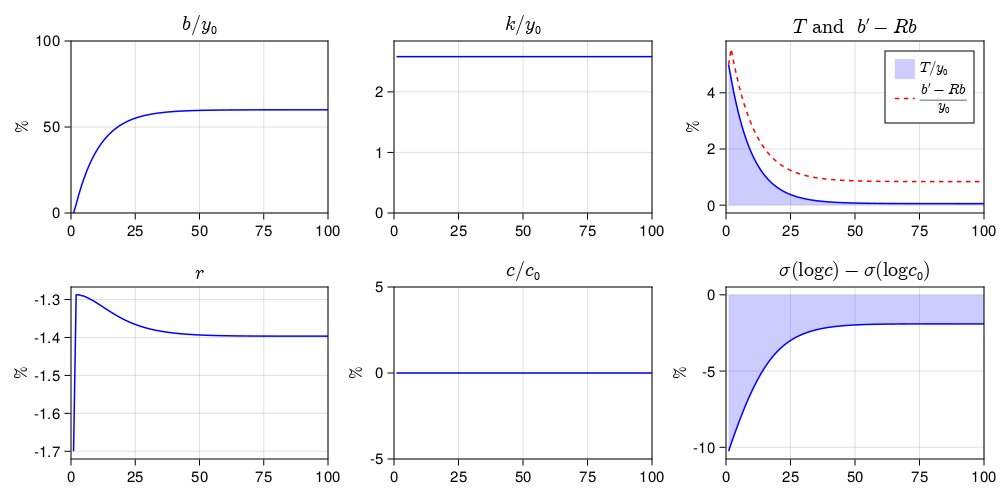

In [21]:
f1 = do_plots(path, e_init)

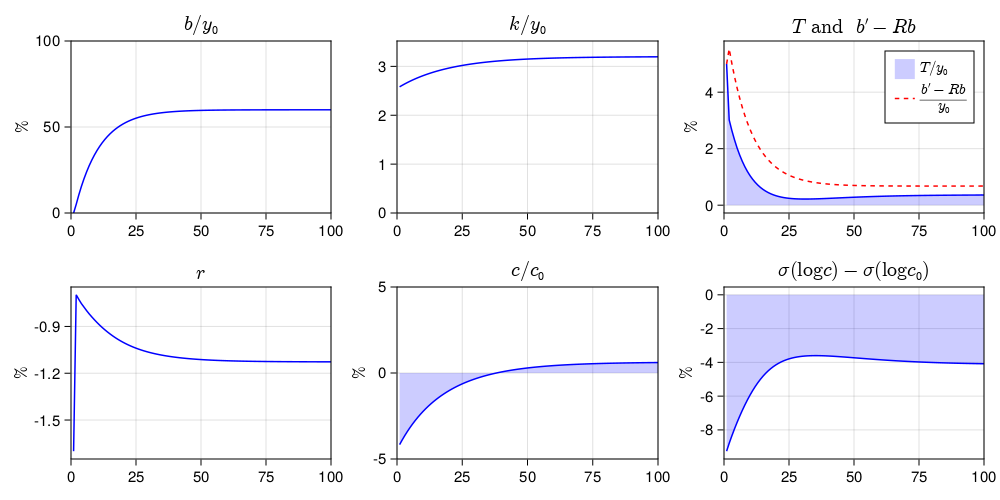

In [22]:
f2 = do_plots(path_2, e_init)

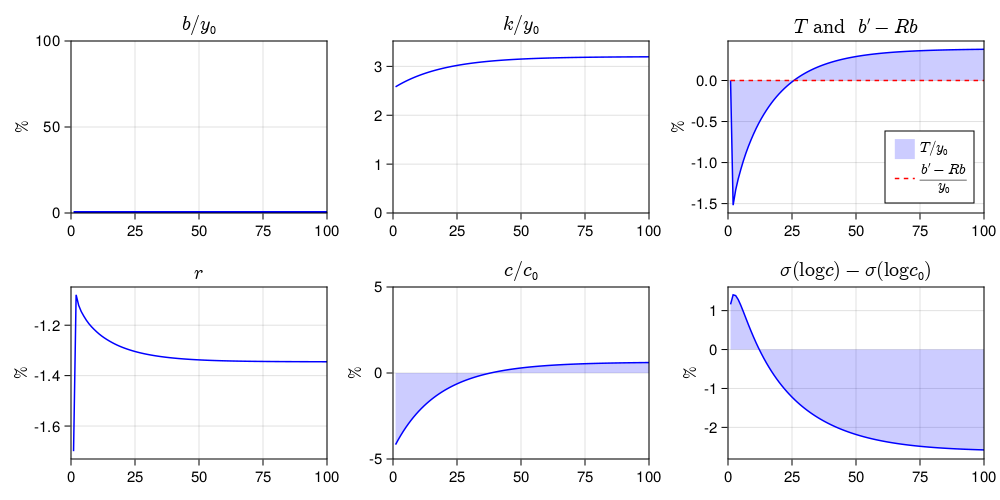

In [23]:
f3 = do_plots(path_3, e_init, legend_pos = :rb, last_plot = true)

##  Steady State Segniorage Plots

In [24]:
# Increasing the amax so that it doesn't bind
h_2 = let 
    v = GHH(θ = 1.0, ν = 0.2)

    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1 + v.ν)
    sigmaIID = sqrt(0.0522)/(1 + v.ν)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    ies = 1 
    crra = 5.5
    β = 0.993
    u = EZ(ies = ies, ra = crra, β = β)
    Household(u = u, a_grid = grid(stop = 50, length = 500, scale = :log), 
        v = v, P = P, z_grid = z_vals)
end

EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..49.999999999999986

In [25]:
# Solve laissez-faire economy
@time e_init_2 = stationary_laissez_faire(h_2, t; r_range = (-0.02, 0.0), verbose = true)

error: -0.12121799348709028 r:-0.02 w:0.15254117924438806 n:0.7247574424512584 k:0.5922608300231876 a:0.47104283653609735
error: 2.22728630128447 r:0.0 w:0.13862904668844298 n:0.7110270304758057 k:0.4224385688767519 a:2.649724870161222
error: 2.22728630128447 r:-1.5289598498960423e-155 w:0.13862904668844298 n:0.7110270304758057 k:0.4224385688767519 a:2.649724870161222
error: -0.10092780257607459 r:-0.019477013534555793 w:0.15211578775002538 n:0.7243527646609099 k:0.5864456291580876 a:0.48551782658201303
error: -0.010478133211107687 r:-0.01730442160108859 w:0.15039000367960884 n:0.7227016693287598 k:0.5632730248906117 a:0.552794891679504
error: -0.0032775953866106544 r:-0.017142368766677313 w:0.15026387635971064 n:0.7225804072548703 k:0.5616056534540007 a:0.55832805806739
error: 2.2272863015934377 r:-5.042863390002576e-79 w:0.13862904668844298 n:0.7110270304758057 k:0.4224385688767519 a:2.6497248704701897
error: 8.10716168697656e-6 r:-0.01706894039207107 w:0.1502068422841934 n:0.7225255

Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336852..3.621762275547824], P=[..], a_grid = 0.0..500pts..49.999999999999986, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.017069121031318298, w=0.1502069825037234, T=0.0, a=0.5608546960501402, k=0.5608546904049896, b=0.0, n=0.7225256813763294

In [ ]:
r_range_ = [e_init_2.r, 0.0]
b_range  =  2.6:-0.2:0.2
out = Array{Any}(undef, length(b_range))
Polyester.disable_polyester_threads() do
    p = Progress(length(b_range))
    @time Threads.@threads for i in eachindex(b_range)
        b = b_range[i]
        sol = stationary_equilibrium_given_k_b(
            e_init_2,
            e_init_2.k,
            b * y(e_init_2);
            r_range = r_range_,
            verbose = false,
            hh_problem_kwargs = (;
                value_tol = 1e-7, 
                policy_tol = 1e-7, 
                pdf_tol = 1e-7)
        )
        out[i] = sol
        next!(p)
    end
end
# out = @showprogress map(f, 2.6:-0.2:0.2)
push!(out, e_init_2);

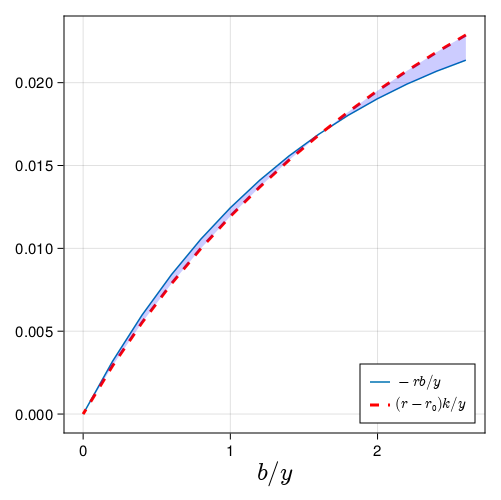

In [37]:
f4 = let
    b_y = [eq.b / y(eq) for eq in out]
    rb = [-eq.r * eq.b / y(eq) for eq in out]
    deltark = [(eq.r - e_init_2.r) * eq.k / y(eq) for eq in out]
    fig = Figure(resolution = (1002/2, 500))
    ax = Axis(fig[1, 1], xlabel = L"b/y", xlabelsize = 25)
    lines!(ax, b_y, rb,  label=L"$- r  b / y$")
    lines!(ax, b_y, deltark, color = :red, linestyle = :dash, linewidth = 3, label = L"$(r - r_0)  k / y")
    band!(ax, b_y, deltark, rb, color = (:blue, 0.2))
    axislegend(position = :rb)
    fig 
end

## Present Value of Elasticities

### Partial Equilibrium

In [ ]:
cap_s = 50   # time of policy change
cap_t = 1_000  # total period of integration

The interest rate is fixed.

In [ ]:
function pv_PE(;R, ies_range, μ_range, 
    T = 0.0, w = 1.0, 
    cap_s = cap_s, cap_t = cap_t, Δ = 1e-4,
    value_tol = 1e-7, policy_tol = 1e-7, pdf_tol = 1e-7
)
    r = R - 1
    v = GHH(θ = 1.0, ν = 0.2)
    a_grid = grid(; stop = 250.0, length = 200, scale = :log)

    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1 + v.ν)
    sigmaIID = sqrt(0.0522)/(1 + v.ν)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    δ = 0.1
    crra = 5.5 
    β = 0.993
    
    lst = similar(ies_range, Any)
    
    Polyester.disable_polyester_threads() do
        p = Progress(length(ies_range))
        Threads.@threads for i in eachindex(ies_range)
            ies = ies_range[i]
            u = EZ(ies = ies, ra = crra, β = β)
            h = Household(u = u, a_grid = a_grid, v = v, P = P, z_grid = z_vals)
            ws = stationary(h; R, T, w, verbose = false, value_tol, policy_tol, pdf_tol)

            !is_pol_valid(ws.a_pol, h) && @warn "R =$R, ies = $ies. Not valid policy!"

            cache = JacobianCache(ws; R, T, w, cap_s, cap_t, ΔR = 1e-4, ΔT = 0.0) # compute cache only once

            pv_lst = map(μ_range) do μ 
                Rk = μ * (r + δ) + 1 - δ
                return (; 
                    pv = Rk > 1 ? pv_elasticities!(cache, cap_s; Rk) : nothing, 
                    r, μ, ies, crra, β, dyn_efficient = Rk > 1)
            end
            lst[i] = pv_lst
            next!(p)
        end 
    end 
    
    return lst
end 

In [30]:
ies_range = range(0.05, 1.5, length = 100)
μ_range = range(1.001, 3.0, length = 75)
lst_PE = pv_PE(;R = 1 + e_init.r, ies_range, μ_range);

Progress: 100%|█████████████████████████████████████████| Time: 0:04:50


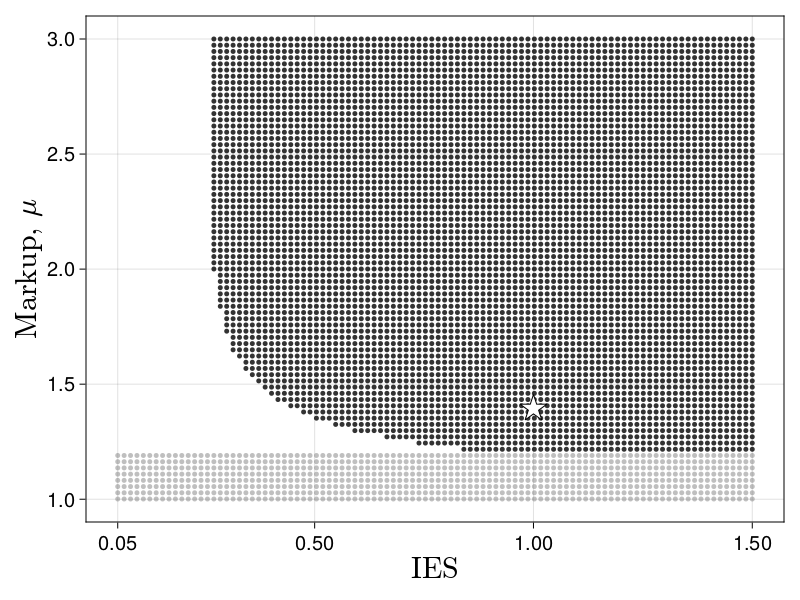

In [31]:
fig_pv_PE = let lst = lst_PE
    
    flattened_lst = collect(Base.Iterators.flatten(lst))

    dyn_eff = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv > 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    bad = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv <= 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    dyn_ine = let 
        tmp = filter(flattened_lst) do x 
            !x.dyn_efficient
        end
        [(x.ies, x.μ) for x in tmp]
    end

    fig = Figure(fontsize = 20)
    ax = Axis(fig[1, 1], xlabel = LaTeXString("IES"), ylabel = LaTeXString("Markup, \$\\mu\$"), 
        xlabelsize = 30, ylabelsize = 30) 
    ax.xticks = [0.05, 0.5, 1., 1.5]
    plot!(ax, [x[1] for x in dyn_eff], [x[2] for x in dyn_eff], color = (:black, 0.8), markersize = 5)
    plot!(ax, [x[1] for x in dyn_ine], [x[2] for x in dyn_ine], color = (:gray, 0.5), markersize = 5)

    scatter!(ax, [1.0], [1.4], color = :white, markersize = 35, strokecolor = :black, strokewidth= 1, marker = :star5)
    fig
end

### General Equilibrium

The equilibrium interest rate is solved for each parameterization.

In [32]:
function pv_GE(
    μ_range;  
    ies = 1, crra = 5.5, β = 0.993,
    r_range = (-0,07, 0.00), verbose = true, cap_s = cap_s, cap_t = cap_t, Δ = 1e-4,
    value_tol = 1e-7, policy_tol = 1e-7, pdf_tol = 1e-7 
)
    h = let 
        v = GHH(θ = 1.0, ν = 0.2)

        ar1 = 0.9695
        sigmaP = sqrt(0.0384)/(1 + v.ν)
        sigmaIID = sqrt(0.0522)/(1 + v.ν)
        P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

        u = EZ(ies = ies, ra = crra, β = β)
        Household(u = u, a_grid = grid(stop = 200.0, length = 200), # Extending a_max given w normalization
            v = v, P = P, z_grid = z_vals) 
    end

    δ = 0.1
    α = 0.3

    w = 1.0  # Normalizing the wage
    T = 0.0
    ws = HouseholdWorkspace(; h, R = 1 + r_range[1], T, w)
    n = labor_supply(h; w)

    f = function (r) 
        stationary!(ws; R = 1 + r, T, w, verbose = false, value_tol, policy_tol, pdf_tol)
        aa = asset_supply(h.a_grid, ws.pdf) 
        dis =  aa / n * (1 - α) - α / (r + δ)
        return dis
    end 

    r = find_zero(f, r_range, A42(), atol = 1e-6)
    stationary!(ws; R = 1 + r, T, w, verbose = false)
    !is_pol_valid(ws.a_pol, h) && @warn "Not valid policy!"
    
    cache = JacobianCache(ws; R = 1 + r, T, w, cap_s, cap_t, ΔR = 1e-4, ΔT = 0.0) # compute cache only once

    pv_lst = map(μ_range) do μ 
        Rk = μ * (r + δ) + 1 - δ
        return (; 
            pv = Rk > 1 ? pv_elasticities!(cache, cap_s; Rk) : nothing, 
            r, μ, ies, crra, β, dyn_efficient = Rk > 1)
    end 
    return pv_lst
end 

pv_GE (generic function with 1 method)

In [33]:
ϵ_range = range(0.05, 1.5, length = 100)
μ_range = range(1.001, 3.0, length = 75)
lst_GE = similar(ϵ_range, Any)
Polyester.disable_polyester_threads() do
    p = Progress(length(ϵ_range))
    @time Threads.@threads for i in eachindex(collect(reverse(ϵ_range)))
        lst_GE[i] =  pv_GE(μ_range; ies = ϵ_range[i], r_range = (-0.07, 0.00))
        next!(p)
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:26:29


1589.408663 seconds (25.22 M allocations: 22.637 GiB, 0.14% gc time, 0.10% compilation time)


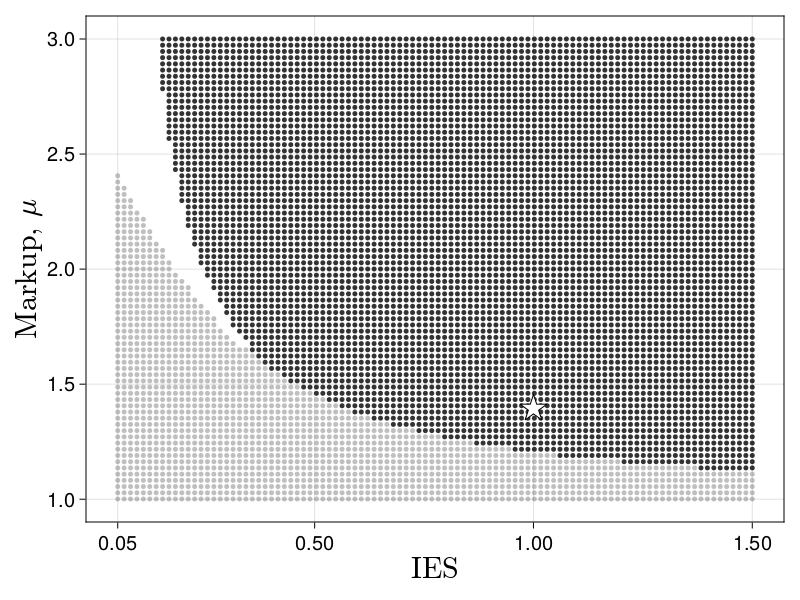

In [34]:
fig_pv_GE = let lst = lst_GE
    flattened_lst = collect(Base.Iterators.flatten(lst))

    dyn_eff = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv > 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    bad = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv <= 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    dyn_ine = let 
        tmp = filter(flattened_lst) do x 
            !x.dyn_efficient
        end
        [(x.ies, x.μ) for x in tmp]
    end

    fig = Figure(fontsize = 20)
    ax = Axis(fig[1, 1], xlabel = LaTeXString("IES"), ylabel = LaTeXString("Markup, \$\\mu\$"), 
        xlabelsize = 30, ylabelsize = 30) 
    ax.xticks = [0.05, 0.5, 1., 1.5]
    plot!(ax, [x[1] for x in dyn_eff], [x[2] for x in dyn_eff], color = (:black, 0.8), markersize = 5)
    plot!(ax, [x[1] for x in dyn_ine], [x[2] for x in dyn_ine], color = (:gray, 0.5), markersize = 5)
    
    scatter!(ax, [1.0], [1.4], color = :white, markersize = 35, strokecolor = :black, strokewidth= 1, marker = :star5)

    fig 
end 

## Saving the Figures and Statistics

In [35]:
save(joinpath(@__DIR__, "..", "output", "figures", "transition_efficient_fixed_k.pdf"), f1)
save(joinpath(@__DIR__, "..", "output", "figures", "transition_efficient_golden_k.pdf"), f2)
save(joinpath(@__DIR__, "..", "output", "figures", "transition_efficient_no_debt.pdf"), f3)
save(joinpath(@__DIR__, "..", "output", "figures", "steady_state_transfers.pdf"), f4)

In [36]:
save(joinpath(@__DIR__, "..", "output", "figures", "pv_elasticities_regions_PE.pdf"), fig_pv_PE);
save(joinpath(@__DIR__, "..", "output", "figures", "pv_elasticities_regions_GE.pdf"), fig_pv_GE);

In [ ]:
open(joinpath(@__DIR__, "..", "output", "tables", "statistics.txt"), "w") do file
    write(file, statistics)
end